# property price prediction project

## problem objective

In [1]:
# The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

# Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.



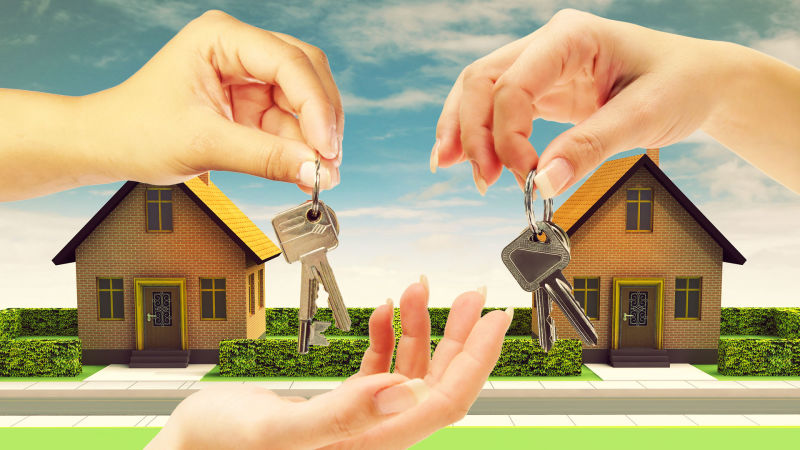

In [2]:
import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

# step 1 : import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
#dataset
from sklearn.datasets import fetch_california_housing
warnings.filterwarnings('ignore')
print('modules loaded successfully')

modules loaded successfully


# step 2 : lload data create DF

In [4]:
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
print(data_dict['target_names'])

['MedHouseVal']


In [7]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print('Data Loaded Successfully!!')

Data Loaded Successfully!!


# step 3 : understand data using EDA

In [8]:
# Shape
df.shape

(20640, 9)

In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# Checking Null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [11]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
# hundreds of thousands of dollars ($100,000) 1lakh dollars
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6972,2.7578,46.0,4.47619,1.054422,880.0,1.995465,33.98,-118.03,2.368


In [13]:
#all data must be in numerical, dataet contains all values in numerical
#we can proceed this for analysis



In [14]:
#checking data distribution

# sns.pairplot(data = df)
# plt.show()

In [15]:

# sns.pairplot(data = df,corner = False)
# plt.show()

In [16]:

# sns.pairplot(data = df,corner = True)
# plt.show()

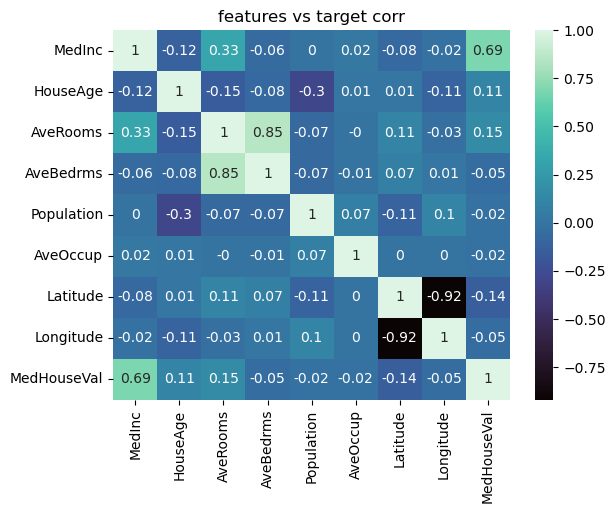

In [17]:
# Checking data Distribution
plt.title('features vs target corr')
sns.heatmap(df.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map(-1 to 1)
plt.show()

In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


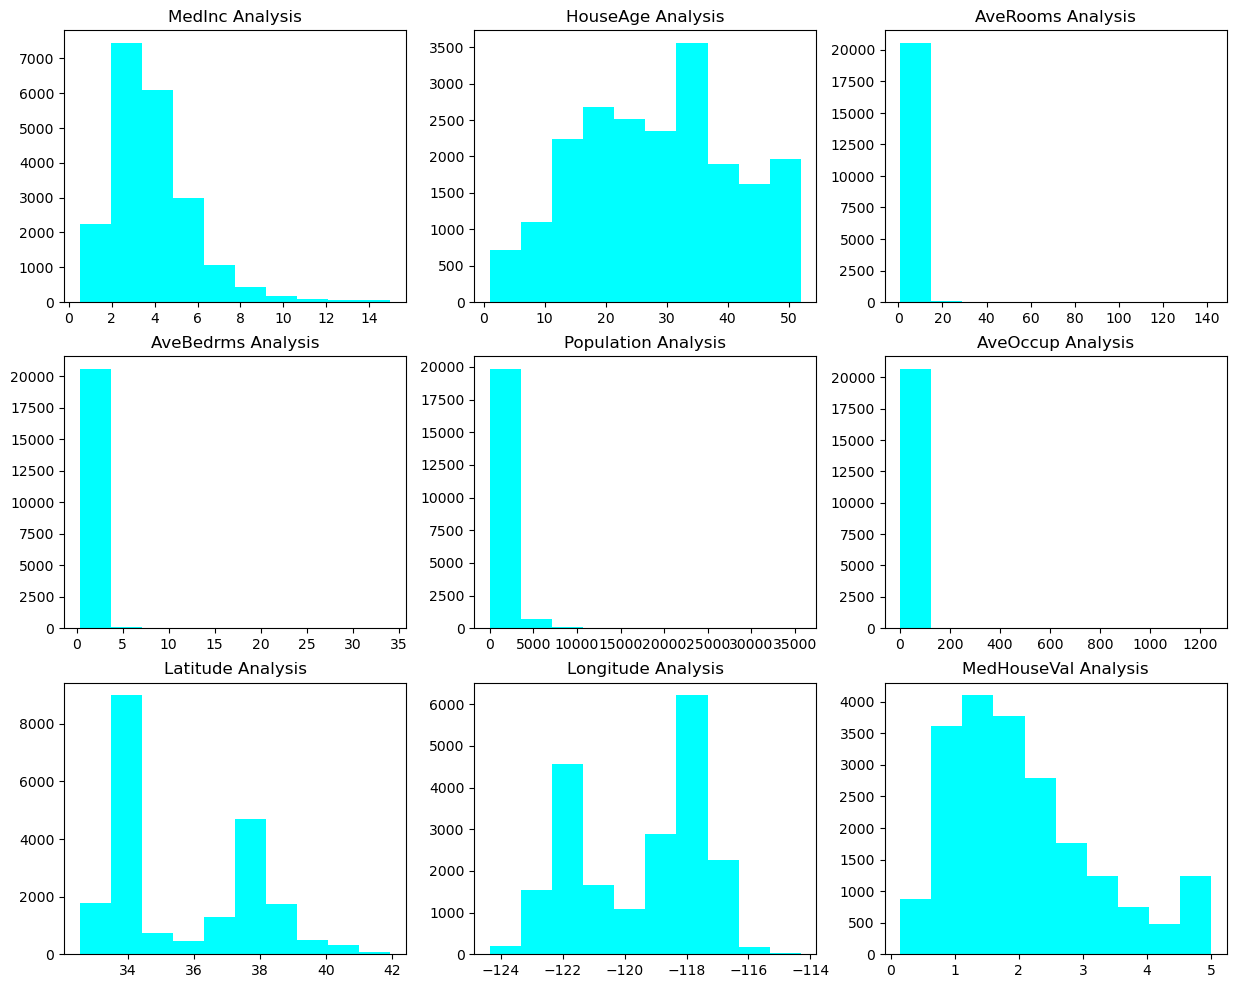

In [19]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'cyan')
  plt.title(j+' Analysis')
plt.show()

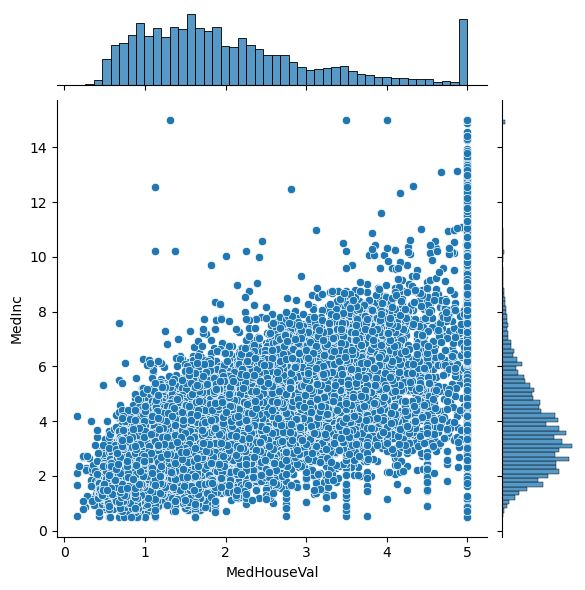

In [20]:
# Distribution of target Value MedHousevalue

sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

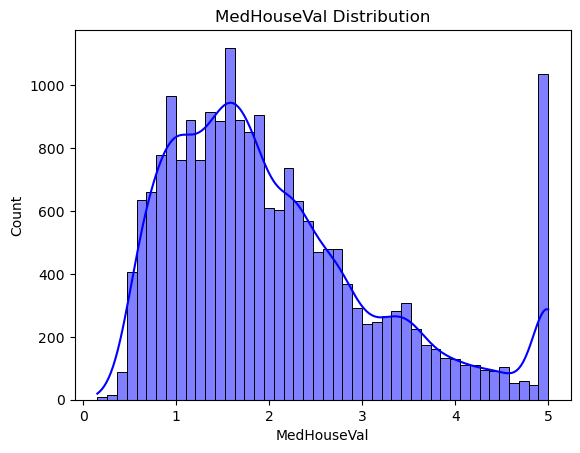

In [21]:
plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b',kde= True)
plt.show()

In [22]:
df['MedHouseVal'].describe()
# 75 % of price less than 2.64 lakh dollars

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

# step 4 : feature engineering and preprocessing


In [23]:
# Convert data to Same Scale for better prediction
# normalization = minmax_scale
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')

Done


In [24]:
print(f"Minimum Value: {X_scaled.min()}")
print(f"Maximum Value: {X_scaled.max()}")

Minimum Value: 0.0
Maximum Value: 1.0000000000000002


# step 5 : train test split : split data for training and testing part

In [25]:
#train test split : divide into train part test part

from sklearn.model_selection import train_test_split

xTrain,xTest,yTrain,yTest = train_test_split(X_scaled,y,test_size = .2 , random_state = 42)
print('done')

done


In [26]:
b,a,c,d = [23,534,6,65]  #unpacking
print(a)

534


In [27]:
import random
random.seed(56)
random.randint(1,50)

36

In [28]:
print('shape of x_Train',xTrain.shape)
print('shape of x_Test',xTest.shape)
print('shape of y_Train',yTrain.shape)
print('shape of y_Test',yTest.shape)

shape of x_Train (16512, 8)
shape of x_Test (4128, 8)
shape of y_Train (16512,)
shape of y_Test (4128,)


# step 6 : model building

### step-6.1 linear model usinng linear regression

In [29]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(xTrain,yTrain)

LinearRegression()

### step-6.2 model prediction

In [30]:
#test data : X_test

y_pred = lr_model.predict(xTest)
print('done')

done


In [31]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [32]:
# 20% : actual answer : yTest , predicted: y_pred

lr_compare_df = pd.DataFrame({'actual house price':yTest,
                              'predicted house price':y_pred})

print('done')

done


In [33]:
lr_mae = mean_absolute_error(yTest,y_pred)
print('LR_MAE',lr_mae)

LR_MAE 0.5332001304956557


In [34]:
lr_mse = mean_squared_error(yTest,y_pred)
print('LR_MSE',lr_mse)

LR_MSE 0.5558915986952438


In [35]:
#training score

lr_train_score = lr_model.score(xTrain,yTrain)
print('training score',lr_train_score)



#testing Score
lr_test_score = lr_model.score(xTest,yTest)
print('testing score',lr_test_score)

training score 0.6125511913966952
testing score 0.5757877060324512


In [36]:
#model score : apx:60%, model not that much good, we need, mae parameter 

### step-6.1.3 : checking VIF and drop column if value vif>10

In [37]:
xTrain_df = pd.DataFrame(xTrain, columns = data_dict['feature_names'])
xTrain_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14872,0.089088,0.647059,0.025183,0.022438,0.016789,0.001264,0.275239,0.588645


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

xTrain_df['intercept'] = 1
xTrain_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
5966,0.168646,0.529412,0.031879,0.019379,0.021778,0.001474,0.453773,0.461155,1


In [39]:
xTrain_df.sample

<bound method NDFrame.sample of          MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      0.190322  0.627451  0.029572   0.019953    0.064380  0.002414   
1      0.228452  0.941176  0.025715   0.020978    0.036744  0.000842   
2      0.252162  0.058824  0.034025   0.019322    0.025561  0.001634   
3      0.099488  0.686275  0.022378   0.020765    0.039659  0.002657   
4      0.210638  0.823529  0.038439   0.023741    0.024412  0.001294   
...         ...       ...       ...        ...         ...       ...   
16507  0.404829  0.666667  0.037451   0.017577    0.018358  0.001883   
16508  0.175867  0.627451  0.042693   0.027752    0.049048  0.002585   
16509  0.167894  0.686275  0.022264   0.022125    0.049133  0.002124   
16510  0.359947  0.274510  0.039338   0.021778    0.049721  0.002001   
16511  0.143143  1.000000  0.018123   0.021505    0.073320  0.001140   

       Latitude  Longitude  intercept  
0      0.018066   0.729084          1  
1      0.130712   0.616

In [40]:
xTrain_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'intercept'],
      dtype='object')

In [41]:
xTrain_df.shape

(16512, 9)

In [42]:
xTrain_df.values

array([[0.19032151, 0.62745098, 0.02957193, ..., 0.01806589, 0.72908367,
        1.        ],
       [0.22845202, 0.94117647, 0.0257147 , ..., 0.13071201, 0.61653386,
        1.        ],
       [0.25216204, 0.05882353, 0.03402509, ..., 0.22529224, 0.38545817,
        1.        ],
       ...,
       [0.16789424, 0.68627451, 0.02226356, ..., 0.15834219, 0.59462151,
        1.        ],
       [0.35994676, 0.2745098 , 0.03933843, ..., 0.53560043, 0.23804781,
        1.        ],
       [0.14314285, 1.        , 0.01812257, ..., 0.55579171, 0.19223108,
        1.        ]])

In [43]:
vif_df = pd.DataFrame()
vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(xTrain_df.values,i) for i in range(xTrain_df.shape[1])]

vif_df['VIF factor'] = vif_value

vif_df.sort_values(by = 'VIF factor',ascending = False)

,Features,VIF factor
8,Intercept,176.011336
6,Latitude,9.206134
7,Longitude,8.875984
2,AveRooms,7.917240
3,AveBedrms,6.609200
0,MedInc,2.539815
1,HouseAge,1.237337
4,Population,1.134824
5,AveOccup,1.009733


In [44]:
col = list(X.columns)
col.remove('Latitude')

#print col
xTrain_vif = xTrain_df[col]
xTrain_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
11751,0.308292,0.254902,0.040413,0.020431,0.073741,0.002096,0.276892


In [53]:

def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model




    

In [46]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [47]:
from sklearn.linear_model import Lasso, Ridge

,model training score,model test score,MAE error,MSE error,RMSE error,model r2 score
1,0.547181,0.510279,0.577096,0.641735,0.801084,0.510279


In [48]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

(   model training score  model test score  MAE error  MSE error  RMSE error  \
 1                   0.0         -0.000219   0.906069   1.310696    1.144856   
 
    model r2 score  
 1       -0.000219  ,
 Lasso())

In [49]:
ml_model = Ridge

built_model(ml_model,col)[0]

(   model training score  model test score  MAE error  MSE error  RMSE error  \
 1              0.527524          0.507895   0.594467   0.644859    0.803031   
 
    model r2 score  
 1        0.507895  ,
 Ridge())

In [50]:
print(col)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [51]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']

In [54]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)                                    

Score is: 0.6095923104950529
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.532577,0.609592,0.548665,0.552363,0.743211,0.609592


In [55]:
final_model

Ridge()

# step 7: save model and extra objects

In [56]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb')as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb')as f:
    pickle.dump(sc,f)

print('ML model and scaller saved successfully')


ML model and scaller saved successfully


# step 8 : website buildinng and localhost deployyment

In [65]:
import streamlit as st
print('done')

done


In [66]:
#st.title('california housing price prediction')


In [67]:
# ! : represents run this code in terminal

In [78]:
!streamlit run house.py

^C


In [74]:
import os

'C:\\Users\\Jass'

In [72]:
col

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Longitude']

In [80]:
df.to_csv('california.csv')
print('done')

done


In [82]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])
    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333
min Longitude -124.35
max Longitude -114.31


In [83]:
temp_df = pd.read_csv('California.csv')

for i in temp_df[col]:
    min_value, max_value = temp_df[i].agg(['min','max'])


In [85]:
# sc.get_features_names_out()

# step 9 : Live Deployment Using Streamlit

In [86]:
# import streamlit as st
# import pandas as pd
# import random
# from sklearn.preprocessing import StandardScaler
# import pickle

In [87]:
#github : folder housing price project
#requirements.txt = we will write those modules which is important for app.py to 

In [88]:
pd.__version__

'2.2.3'

In [90]:
st.__version__

'1.45.1'

In [93]:
# random.__version__

In [94]:
import sklearn